# Libraries in Oregon

## Intro

Public libraries can have a significant positive impact on communities, whether it be by providing small business and entrepreneur support,  resources for job seekers, or by providing a place to learn about new technologies. It can also be a deciding factor for people to move to a community.

Every year the State Library of Oregon collects an Oregon Public Library Statistical Report.  Every library that is accredited/defined as a library submits information. These statistics are used in the national Public Library Survey dataset. 

The data used is from https://catalog.data.gov/dataset/oregon-public-library-statistics. 

More information about this dataset as well as a pdf describing the contents can be found here:

https://data.oregon.gov/dataset/Oregon-Public-Library-Statistics/8zw7-zgjw. 

A more detailed description of the contents can also be found here: 

https://github.com/IMLS/public-libraries-survey/blob/master/FY%202022%20Data%20Elements.pdf

## Scoping

- Problem: Libraries are required to report statistics, but sometimes that information is missing.
- How ML will be used: Let’s see if there are important variables that can predict a library's Registered Users or Library Visits when that information is missing.

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv('Oregon_Public_Library_Statistics.csv')
pd.set_option('display.max_columns', None)
df.head()

LIBID  Year                        LibraryName  \
0  OR0040  2022               Adams Public Library   
1  OR0001  2022  Agness Community Library District   
2  OR0106  2022              Albany Public Library   
3  OR9010  2022            Aloha Community Library   
4  OR0002  2022               Amity Public Library   

                             Address    City      ZIP  \
0                        190 Main St   Adams  97810.0   
1                    03905 Cougar Ln  Agness  97406.0   
2                   2450 14th Ave SE  Albany  97322.0   
3  17455 SW Farmington Rd, Suite 26a   Aloha  97007.0   
4                     307 S Trade St   Amity  97101.0   

                   MailingAddress MailingCity  MailingZIP      County  \
0                       PO Box 20       Adams     97810.0    Umatilla   
1                       PO Box 33      Agness     97406.0       Curry   
2                2450 14th Ave SE      Albany     97322.0        Linn   
3  17455 SW Farmington Rd Ste 26a       Aloha     97007.0  Washington   
4                      PO Box 470       Amity     97101.0     Yamhill   

          Phone DistCoop  CentralLibrary  Branches  Bookmobiles  \
0  541-566-3038    UCSLD               1         0            0   
1  541-247-6323     NONE               1         0            0   
2  541-917-7581     NONE               1         1            0   
3  503-259-0185    WCCLS               1         0            0   
4  503-835-8181    CCRLS               1         0            0   

   RegisteredUsers  RegisteredUsersAdded  LibrariansALAMLS  LibrariansTotal  \
0            233.0                  21.0               0.0             1.00   
1            102.0                   4.0               0.0             0.35   
2          35601.0                3275.0               9.5             9.50   
3           8704.0                1143.0               4.0             4.00   
4            645.0                  45.0               0.0             0.18   

   OtherStaff  Volunteers  VolunteerHours FriendsGroup Foundation  \
0        0.00         0.0             0.0        False      False   
1        0.25        12.0            60.0        False      False   
2        9.81       457.0          2930.0         True       True   
3        4.55        20.0          1804.0        False      False   
4        0.18         7.0           109.0         True      False   

   StaffPositionsFT  StaffPositionsPTUnder20  StaffPositionsPTOver20  \
0               0.0                      1.0                     0.0   
1               0.0                      0.0                     1.0   
2              15.0                      5.0                     0.0   
3               6.0                      3.0                     3.0   
4               0.0                      0.0                     2.0   

   StaffPositionsTempOnCall  RevenueCity  RevenueCounty  RevenueDistrict  \
0                       0.0      10000.0            0.0          38479.0   
1                       1.0          0.0            0.0          22656.0   
2                       0.0    2968236.0            0.0              0.0   
3                       0.0          0.0       547623.0              0.0   
4                       0.0        865.0            0.0           9675.0   

   RevenueState  RevenueLSTA RevenueErate  RevenueOtherFed  \
0        3000.0          0.0          NaN              0.0   
1        1000.0          0.0          NaN              0.0   
2        4800.0          NaN          NaN              0.0   
3        3690.0          0.0          NaN              0.0   
4        1205.0          0.0          NaN              0.0   

   RevenueOtherOperating  CaptialRevenueLocal  CapitalRevenueState  \
0                26002.0                  0.0                  0.0   
1                    0.0                  0.0                  0.0   
2               253404.0                  0.0                  0.0   
3                95128.0                  0.0                

In [3]:
# this will make looking at "df" resource consuming, but allow us to look at all the .info(), .value_counts(), etc.
pd.set_option('display.max_rows', None)

## Inspect data

What are the characteristics of the data, and what kind of Exploratory Data Analysis might we do?

In [4]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 168 columns):
 #    Column                             Non-Null Count  Dtype  
---   ------                             --------------  -----  
 0    LIBID                              1775 non-null   object 
 1    Year                               1775 non-null   int64  
 2    LibraryName                        1775 non-null   object 
 3    Address                            1747 non-null   object 
 4    City                               1747 non-null   object 
 5    ZIP                                1747 non-null   float64
 6    MailingAddress                     1759 non-null   object 
 7    MailingCity                        1759 non-null   object 
 8    MailingZIP                         1759 non-null   float64
 9    County                             1775 non-null   object 
 10   Phone                              1735 non-null   object 
 11   DistCoop                           1775 n

We have a dataset with 1775 entries, and 168 columns, with a combination of objects, integers, and floats.  It includes a unique identifier for each library system, their name, location data, and various statistics such as:

- number of branches
- registered users
- amount of staff and volunteers, and their hours and salaries
- budget
- the makeup of their collections and programs
- circulation numbers
- hours

We can also see that only 4% of the columns have no missing values, and we will need to inspect those in order to fill in, replace, or drop values and features.

Initially, it looks like Programs are where the bulk of the data is missing. Also, it looks like there is a lack of physical and digital items for Spanish and other language speakers, as well as information on staffing. 

In [5]:
((len(df.columns) - df.isnull().any().sum()) / len(df.columns)) * 100

4.761904761904762

Looking at the pdf guide provide to explain the fields, we can see which fields are required or not.  For example, staff compensation is optional. The LIBID is a number assigned to each library in Oregon by the State Library of Oregon, and is not filled in by the reporting library.

Some of the data should be boolean types. For example, whether the library has a Friends or Library Foundation is a required question, but the values are `True` and `False`, but also `NaN`s.

Erate revenue is listed as text, and has `NaN`, `no`, `yes`, and floats. 

In [6]:
df.describe()

Year           ZIP    MailingZIP  CentralLibrary     Branches  \
count  1775.000000   1747.000000   1759.000000     1775.000000  1775.000000   
mean   2016.055775  97414.406411  97413.687322        0.961690     0.644507   
std       3.734531    291.001879    290.136832        0.191997     2.363367   
min    2010.000000  97005.000000  97005.000000        0.000000     0.000000   
25%    2013.000000  97128.000000  97132.000000        1.000000     0.000000   
50%    2016.000000  97391.000000  97391.000000        1.000000     0.000000   
75%    2019.000000  97703.000000  97703.000000        1.000000     0.000000   
max    2022.000000  97918.000000  97918.000000        1.000000    18.000000   

       Bookmobiles  RegisteredUsers  RegisteredUsersAdded  LibrariansALAMLS  \
count  1775.000000      1649.000000            528.000000       1765.000000   
mean      0.049577     15201.502122           1436.304924          3.202487   
std       0.219712     42704.775050           5275.010102          7.858772   
min       0.000000         0.000000              0.000000          0.000000   
25%       0.000000       944.000000             66.000000          0.000000   
50%       0.000000      3993.000000            266.500000          1.000000   
75%       0.000000     11950.000000            849.000000          3.000000   
max       2.000000    465828.000000          64661.000000         91.000000   

       LibrariansTotal   OtherStaff    Volunteers  VolunteerHours  \
count      1767.000000  1768.000000   1751.000000     1747.000000   
mean          3.766276    10.028727    106.928612     3454.862049   
std           7.841902    39.053443    827.808885     7687.638999   
min           0.000000     0.000000      0.000000        0.000000   
25%           0.940000     0.400000      8.000000      200.000000   
50%           1.000000     3.000000     24.000000      911.000000   
75%           3.300000     6.690000     62.000000     2953.500000   
max          91.000000   471.700000  33516.000000    74397.000000   

       StaffPositionsFT  StaffPositionsPTUnder20  StaffPositionsPTOver20  \
count        135.000000               135.000000              135.000000   
mean           9.629630                 5.429630                2.407407   
std           35.563217                14.509668                9.103301   
min            0.000000                 0.000000                0.000000   
25%            0.000000                 1.000000                0.000000   
50%            3.000000                 2.000000                1.000000   
75%            6.500000                 4.000000                2.000000   
max          392.000000               135.000000              101.000000   

       StaffPositionsTempOnCall   RevenueCity  RevenueCounty  RevenueDistrict  \
count                135.000000  1.766000e+03   1.765000e+03     1.768000e+03   
mean                   3.281481  3.925801e+05   4.122152e+05     8.174482e+05   
std                    7.571206  1.256656e+06   2.788917e+06     5.524536e+06   
min                    0.000000  0.000000e+00   0.000000e+00     0.000000e+00   
25%                    0.000000  0.000000e+00   0.000000e+00     0.000000e+00   
50%                    0.000000  2.382350e+04   0.000000e+00     4.682950e+04   
75%                    2.000000  2.302915e+05   3.000000e+02     3.767278e+05   
max                   51.000000  1.513614e+07   5.420358e+07     8.555441e+07   

        RevenueState    RevenueLSTA  RevenueOtherFed  RevenueOtherOperating  \
count    1767.000000    1761.000000      1767.000000           1.767000e+03   
mean     6889.370685    3615.412834      2084.835880           8.967985e+04   
std     33998.789895   25699.732670     18632.935902           3.204057e+05   
min         0.000000       0.000000         0.000000          -7.121000e+03   
25%      1000.000000       0.000000         0.000000           1.748000e+03   
50%      1339.000000       0.000000         0.000000           1.485300e+04   


I initially thought this dataset was for the current year, however this particular dataset contains information for the years 2010-2022.  We can just look at the most recent year, 2022, and make it a bit more manageable to work with.

There is at least one library that has negative revenue from one source, and there may be `0`s instead of null values in a lot of fields. This would be a good place to check in with a domain expert, if we had that resource available.

Some columns have both `0`s and `NaN` in them which makes me think they are both deliberate and accurate.

There also appear to be some(?) larger library systems that may skew our results.

In [7]:
# look at only multnomah county
df.loc[df['County'] == 'Multnomah']

LIBID  Year               LibraryName          Address      City  \
79    OR0063  2022  Multnomah County Library  919 NE 19th Ave  Portland   
218   OR0063  2021  Multnomah County Library  919 NE 19th Ave  Portland   
360   OR0063  2020  Multnomah County Library  919 NE 19th Ave  Portland   
503   OR0063  2019  Multnomah County Library  919 NE 19th Ave  Portland   
638   OR0063  2018  Multnomah County Library  919 NE 19th Ave  Portland   
775   OR0063  2017  Multnomah County Library  919 NE 19th Ave  Portland   
913   OR0063  2016  Multnomah County Library  919 NE 19th Ave  Portland   
1050  OR0063  2015  Multnomah County Library  919 NE 19th Ave  Portland   
1185  OR0063  2014  Multnomah County Library  919 NE 19th Ave  Portland   
1320  OR0063  2013  Multnomah County Library  919 NE 19th Ave  Portland   
1454  OR0063  2012  Multnomah County Library  919 NE 19th Ave  Portland   
1587  OR0063  2011  Multnomah County Library  919 NE 19th Ave  Portland   
1720  OR0063  2010  Multnomah County Library  919 NE 19th Ave  Portland   

          ZIP              MailingAddress MailingCity  MailingZIP     County  \
79    97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
218   97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
360   97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
503   97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
638   97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
775   97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
913   97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
1050  97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
1185  97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
1320  97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
1454  97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
1587  97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   
1720  97232.0  919 NE 19th Ave, Suite 250    Portland     97232.0  Multnomah   

             Phone DistCoop  CentralLibrary  Branches  Bookmobiles  \
79    503-988-5403     NONE               1        18            0   
218   503-988-5403     NONE               1        18            0   
360   503-988-5403     NONE               1        18            0   
503   503-988-5403     NONE               1        18            0   
638   503-988-5403     NONE               1        18            0   
775   503-988-5403     NONE               1        18            0   
913   503-988-5403     NONE               1        18            0   
1050  503-988-5403     NONE               1        18            0   
1185  503-988-5403     NONE               1        18            0   
1320  503-988-5403     NONE               1        18            0   
1454  503-988-5403     NONE               1        18            0   
1587  503-988-5403     NONE               1        18            0   
1720  503-988-5403     NONE               1        17            0   

      RegisteredUsers  RegisteredUsersAdded  LibrariansALAMLS  \
79           361923.0               54713.0             63.25   
218          388868.0               52555.0             64.25   
360          404587.0               64661.0             67.00   
503          416935.0               52554.0             67.50   
638          465828.0                   NaN             83.50   
775          444459.0                   NaN             83.50   
913          436476.0                   NaN             82.50   
1050         444231.0                   NaN             80.75   
1185         432685.0                   NaN             78.75   
1320         441505.0                   NaN             74.75   
1454         444618.0                   NaN             83.25   
1587         436949.0                   NaN             83.25   
1720     

Looking at Multnomah County, the largest system in the state, I realize they do not list the individual branch locations - all 18 branches and 1 central library are under one listing with the same address - and so I definitely want to just concentrate on 2022 for ML to answer questions about the current state of the libraries and have a manageable dataset.

And finally, here are tables of the codes used in the dataset. These were difficult to track down, so I'm putting them here incase anyone else is looking for an easy-to-read breakdown of them.  They are:
- the geographic codes describe the LSA (Legal Service Area) are defined by the U.S. Census Bureau, and are under 'GeographicCode'

And as identified by the Institute of Museum and Library Services:

- the administrative entity type is under 'AdminStructureCode',
- the legal basis code 'LegalBasisCode',
- and the Interlibrary Loan codes.

Thanks to the Montana State Library for having their Data Elements Guide online. https://msl.mt.gov/libraries/library_development/FY22_Data_Elements_Guide.pdf

In [8]:
pd.set_option('display.max_colwidth', 0)
geo_codes = pd.read_csv('geocodes.csv')
geo_codes.rename(columns={'Code': 'GeoCode'}, inplace=True)
geo_codes

GeoCode  \
0   PL1      
1   PL2      
2   MP1      
3   MP2      
4   CD1      
5   CD2      
6   MD1      
7   MD2      
8   CO1      
9   CO2      
10  CO3      
11  MC1      
12  MC2      
13  MC3      
14  SU1      
15  SU2      
16  SE1      
17  SE2      
18  SS1      
19  SS2      
20  OTH      

                                                                Description  
0   Place (e.g., incorporated city or village, census designated), entirety  
1   Place (e.g., incorporated city or village, census designated), overlap   
2   Multi-Place, entirety                                                    
3   Multi-Place, overlap                                                     
4   Minor Civil Division [MCD] (e.g., town, township), entirety              
5   Minor Civil Division [MCD] (e.g., town, township), overlap               
6   Multi-MCD, entirety                                                      
7   Multi-MCD, overlap                                                       
8   County or Equivalent, entirety                                           
9   County or Equivalent, overlap                                            
10  County or Equivalent, remainder excluding AEs of contained geographies   
11  Multi-County, entirety                                                   
12  Multi-County, overlap                                                    
13  Multi-County, remainder excluding AEs of contained geographies           
14  School District - Unified, entirety                                      
15  School District - Unified, overlap                                       
16  School District - Elementary, entirety                                   
17  School District - Elementary, overlap                                    
18  School District - Secondary, entirety                                    
19  School District - Secondary, overlap                                     
20  Other

In [9]:
admin_structure_codes = pd.read_csv('adminstructurecodes.csv')
admin_structure_codes.dropna()

AdminStructureCode  \
0  MA                  
1  MO                  
2  SO                  

                                                                                                                                                                                                                                                                                                                                                                                                                     Description  
0  Administrative Entity with Multiple Direct Service Outlets where Administrative Offices are separate. An administrative entity that serves the public directly with two or more service outlets, including some combination of one central library, branch(es), bookmobile(s), and/or books-by mail only. The administrative offices are separate from the direct service outlets and do not provide direct library services.  
1  Administrative Entity with Multiple Direct Service Outlets where Administrative Offices are Not Separate. An administrative entity that serves the public directly with two or more service outlets, including some combination of one central library, branch(es), bookmobile(s), and/or books-by mail only.                                                                                                                  
2  Administrative Entity with a Single Direct Service Outlet. An administrative entity that serves the public directly with one central library, books-by-mail only, or one bookmobile.

In [10]:
legal_basis_codes = pd.read_csv('legalbasiscodes.csv')
legal_basis_codes

LegalBasisCode  \
0  CC              
1  CI              
2  CO              
3  LD              
4  MJ              
5  NL              
6  NP              
7  SD              
8  OT              

                                                                                                                                                                                                                                                                                                                                                                                                                Description  
0  City/County. A multi-jurisdictional entity that is operated jointly by a county and a city.                                                                                                                                                                                                                                                                                                                               
1  Municipal Government (city, town, or village). A municipal government is an organized local government authorized in a state's constitution and statutes and established to provide general government for a specific concentration of population in a defined area.                                                                                                                                                      
2  County/Parish. An organized local government authorized in a state's constitution and statutes and established to provide general government.                                                                                                                                                                                                                                                                             
3  Library District. A library district is a local entity other than a county, municipality, township, or school district that is authorized by state law to establish and operate a public library as defined by FSCS. It has sufficient administrative and fiscal autonomy to qualify as a separate government. Fiscal autonomy requires support from local taxation dedicated to library purposes (e.g., a library tax).  
4  Multi-jurisdictional. An entity operated jointly by two or more units of local government under an intergovernmental agreement which creates a jointly appointed board or similar means of joint governance; to be distinguished from a library which contracts to serve other jurisdictions and from special library districts.                                                                                          
5  Native American Tribal Government. An organized local government authorized and established to provide general government to residents of a Native American reservation. Note: Include native Alaskan villages in this category.                                                                                                                                                                                          
6  Nonprofit Association or Agency. An entity privately controlled but meeting the statutory definition of a public library in a given state; includes association libraries and libraries with 501(c) designation.                                                                                                                                                                                                          
7  School District. An organized local entity providing public elementary, secondary, and/or higher education, which under state law, has sufficient administrative and fiscal autonomy to qualify as a separate government. Excludes "dependent public school systems" of county, municipal, township, or state governments.                                                                                                
8  Other.

In [11]:
ill_rel_codes = pd.read_csv('ILLRelCodes.csv')
ill_rel_codes

InterlibraryRelCode  \
0  HQ                   
1  ME                   
2  NO                   

                                                                        Description  
0  Headquarters of a System, Federation, or Cooperative Service                      
1  Member of a System, Federation, or Cooperative Service, but not the headquarters  
2  Not a Member of a System, Federation, or Cooperative Service

## Clean data

First we will split the 2022 data out into its own separate dataframe, then inspect again, and start to manage the missing information.

In [12]:
# zip codes need to be int64 before we split out 2022
df['ZIP'] = df['ZIP'].fillna(0).astype('int64')
df['MailingZIP'] = df['MailingZIP'].fillna(0).astype('int64')
# df['ZIP'] = df['ZIP'].replace(0, np.nan)

In [13]:
# Dataframe with only 2022 values. What would this accomplish? Make it easier to manage?
df_2022 = df[df.Year == 2022]
df_2022.head()

LIBID  Year                        LibraryName  \
0  OR0040  2022  Adams Public Library                
1  OR0001  2022  Agness Community Library District   
2  OR0106  2022  Albany Public Library               
3  OR9010  2022  Aloha Community Library             
4  OR0002  2022  Amity Public Library                

                             Address    City    ZIP  \
0  190 Main St                        Adams   97810   
1  03905 Cougar Ln                    Agness  97406   
2  2450 14th Ave SE                   Albany  97322   
3  17455 SW Farmington Rd, Suite 26a  Aloha   97007   
4  307 S Trade St                     Amity   97101   

                   MailingAddress MailingCity  MailingZIP      County  \
0  PO Box 20                       Adams       97810       Umatilla     
1  PO Box 33                       Agness      97406       Curry        
2  2450 14th Ave SE                Albany      97322       Linn         
3  17455 SW Farmington Rd Ste 26a  Aloha       97007       Washington   
4  PO Box 470                      Amity       97101       Yamhill      

          Phone DistCoop  CentralLibrary  Branches  Bookmobiles  \
0  541-566-3038  UCSLD    1               0         0             
1  541-247-6323  NONE     1               0         0             
2  541-917-7581  NONE     1               1         0             
3  503-259-0185  WCCLS    1               0         0             
4  503-835-8181  CCRLS    1               0         0             

   RegisteredUsers  RegisteredUsersAdded  LibrariansALAMLS  LibrariansTotal  \
0  233.0            21.0                  0.0               1.00              
1  102.0            4.0                   0.0               0.35              
2  35601.0          3275.0                9.5               9.50              
3  8704.0           1143.0                4.0               4.00              
4  645.0            45.0                  0.0               0.18              

   OtherStaff  Volunteers  VolunteerHours FriendsGroup Foundation  \
0  0.00        0.0         0.0             False        False       
1  0.25        12.0        60.0            False        False       
2  9.81        457.0       2930.0          True         True        
3  4.55        20.0        1804.0          False        False       
4  0.18        7.0         109.0           True         False       

   StaffPositionsFT  StaffPositionsPTUnder20  StaffPositionsPTOver20  \
0  0.0               1.0                      0.0                      
1  0.0               0.0                      1.0                      
2  15.0              5.0                      0.0                      
3  6.0               3.0                      3.0                      
4  0.0               0.0                      2.0                      

   StaffPositionsTempOnCall  RevenueCity  RevenueCounty  RevenueDistrict  \
0  0.0                       10000.0      0.0            38479.0           
1  1.0                       0.0          0.0            22656.0           
2  0.0                       2968236.0    0.0            0.0               
3  0.0                       0.0          547623.0       0.0               
4  0.0                       865.0        0.0            9675.0            

   RevenueState  RevenueLSTA RevenueErate  RevenueOtherFed  \
0  3000.0        0.0          NaN          0.0               
1  1000.0        0.0          NaN          0.0               
2  4800.0       NaN           NaN          0.0               
3  3690.0        0.0          NaN          0.0               
4  1205.0        0.0          NaN          0.0               

   RevenueOtherOperating  CaptialRevenueLocal  CapitalRevenueState  \
0  26002.0                0.0                  0.0                   
1  0.0                    0.0                  0.0                   
2  253404.0               0.0                  0.0                   
3  95128.0                0.0                  0.0                   
4  

In [14]:
df_2022.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 0 to 134
Data columns (total 168 columns):
 #    Column                             Non-Null Count  Dtype  
---   ------                             --------------  -----  
 0    LIBID                              135 non-null    object 
 1    Year                               135 non-null    int64  
 2    LibraryName                        135 non-null    object 
 3    Address                            135 non-null    object 
 4    City                               135 non-null    object 
 5    ZIP                                135 non-null    int64  
 6    MailingAddress                     135 non-null    object 
 7    MailingCity                        135 non-null    object 
 8    MailingZIP                         135 non-null    int64  
 9    County                             135 non-null    object 
 10   Phone                              135 non-null    object 
 11   DistCoop                           135 non-null 

So now we have a dataframe with just 135 rows, and fewer missing features.  We will delete some columns and fill in values in others. 

In [15]:
# delete unused columns
df_2022 = df_2022.drop(columns=['RevenueErate',
                                'ExpendituresPeriodicals',
                                'ProgramsKids0-11', 
                                'ProgramsKids0-11Attendance', 
                                'CollectionDigitalVideosODLC', 
                                'CollectionDigitalVideosODLCAdded', 
                                'FacilitiesConstructionDate'])

In [16]:
# fillna with 0
cols_to_fill = ['RevenueLSTA', 'ExpendituresServiceCharges', 'CollectionDatabasesLocalAdded',  'ReferenceTransactions',
'TechPublicComputersSessions', 'TechWebsiteVisits', 'FeesNonresident', 'MeetingRoomUse']

df_2022.loc[:, cols_to_fill] = df_2022.loc[:, cols_to_fill].fillna(0)

In [17]:
# if 'Circ' in column header
circ_cols = list(df_2022.filter(regex='^Circ'))

df_2022.loc[:, circ_cols] = df_2022.loc[:, circ_cols].fillna(0)

In [18]:
# if 'Programs' in column header
prog_cols = list(df_2022.filter(regex='^Programs'))

df_2022.loc[:, prog_cols] = df_2022.loc[:, prog_cols].fillna(0)

In [19]:
# unique fill values
df_2022['ProgramsSummerReading'].replace(0, False, inplace=True)
df_2022['CollectionOtherLanguages'].fillna('None', inplace=True)
df_2022['TechPublicComputersMethod'].fillna('N/A (we don\'t track computer usage)', inplace=True)
df_2022['TechWiFiScenario'].fillna('No Wi-Fi available at this location', inplace=True)
df_2022['TechWiFiSessions'].fillna('n/a', inplace=True)
df_2022['TechWiFiSessions'].fillna('N/A (we don\'t track Wi-Fi usage)', inplace=True)

In [20]:
# what website is missing?
# df_2022[df_2022['Website'].isnull()]
df_2022['Website'].fillna('https://www.ionelibrary.com/', inplace=True)

In [21]:
# sum the hours during week, multiply by 'WeeksOpenYear', and put in 'HoursOpenYear'
df_2022['HoursOpenYear'].fillna((df_2022['HoursWeekday'] + df_2022['HoursWeekdayEvening']) * df_2022['WeeksOpenYear'], inplace=True)

`RegisteredUsers` and `LibraryVisits` are two features we will try to predict, so we will hold off from fill in any `NaN`s right now.

## Data viz

### Where are the most libraries in Oregon?

First, where are the libraries in Oregon?  Let's look at the library locations in Oregon based on how many branches they have.

In [22]:
# Combine the locations within each system
df_2022.loc[:,'TotalNumLib'] = df_2022['CentralLibrary'] + df_2022['Branches'] + df_2022['Bookmobiles']
df_2022.insert(15, 'TotalNumLib', df_2022.pop('TotalNumLib'))

In [23]:
# Create a dataframe with library locations and zip codes and number of libraries
# df_2022['LibraryName']
# df_2022['ZIP']
# df_2022['TotalNumLib'] = df_2022['CentralLibrary'] + df_2022['Branches'] + df_2022['Bookmobiles']

import pandas as pd
import pgeocode
import plotly.graph_objects as go

# Convert the column to string type
df_2022.loc[:,'ZIP'] = df_2022['ZIP'].astype(str)

marker_size = df_2022['TotalNumLib']

# Use pgeocode to get the latitude and longitude for each zip code
nomi = pgeocode.Nominatim('us')
df_2022.loc[:, 'Latitude'] = nomi.query_postal_code(df_2022['ZIP'].tolist()).latitude
df_2022.loc[:, 'Longitude'] = nomi.query_postal_code(df_2022['ZIP'].tolist()).longitude

# Use plotly to create a map with markers for each library
fig = go.Figure(data=go.Scattergeo(
    lon = df_2022['Longitude'],
    lat = df_2022['Latitude'],
    text = df_2022['LibraryName'],
    mode = 'markers',
    marker_size = marker_size,
    marker_color = 'rebeccapurple',
))

# Set the map scope to Oregon
fig.update_layout(
    title = 'Libraries in Oregon',
    geo_scope='usa',
    geo_center=dict(lon=-120.55, lat=43.9),
    geo_projection_scale=4,
)

# Show the map
fig.show()

It looks like there are many library "systems" that only have one library, which is difficult to see in this plot format. Sure, we can roll our cursor over the map and the labels will pop up, but this is not helpful for at-a-glance analysis.

The largest library systems are close to the northern and southern borders, which is good to know if you're looking to move.

To get a better idea of where the libraries are, let's look at a histogram of the counts of libraries around Oregon.

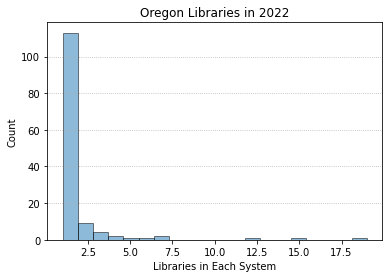

In [24]:
# take a look at histogram first. It is right-skewed.

plt.hist(df_2022['TotalNumLib'], bins=20, edgecolor='black', alpha=0.5)
plt.title('Oregon Libraries in 2022')
plt.xlabel('Libraries in Each System')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')

In [25]:
print('Skew of total number of libraries:')
print(df_2022['TotalNumLib'].skew())

Skew of total number of libraries:
5.333294564684812


A value of greater than 1 means the data is heavily skewed. We expected that from the map.  There are a lot of single libraries in Oregon! 

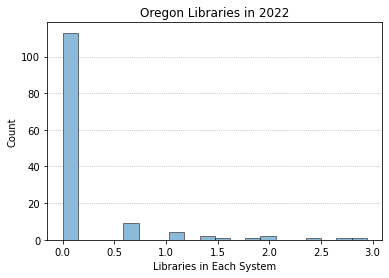

In [26]:
log_numlib = np.log(df_2022['TotalNumLib'])
plt.hist(log_numlib, bins=20, edgecolor='black', alpha=0.5)
plt.title('Oregon Libraries in 2022')
plt.xlabel('Libraries in Each System')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')

In [27]:
print('Skew of the log of total number of libraries')
print(log_numlib.skew())

Skew of the log of total number of libraries
3.0033570378187573


But after applying the log to normalize the data, it is still very skewed and difficult to see how many libraries have more than one location. As expected, since the data is still skewed, the log histogram wasn't much more help.  Let's look at the value counts, and make a pie chart.

In [28]:
df_totalnumlib = pd.DataFrame(df_2022['TotalNumLib'].value_counts().reset_index())
df_totalnumlib

TotalNumLib  count
0  1            113  
1  2            9    
2  3            4    
3  7            2    
4  4            2    
5  5            1    
6  6            1    
7  15           1    
8  12           1    
9  19           1

In [29]:
# create df secifically for piechart
df_piechart = df_totalnumlib.groupby(df_totalnumlib['TotalNumLib'] != 1).sum()
df_piechart

TotalNumLib  count
TotalNumLib                    
False        1            113  
True         73           22

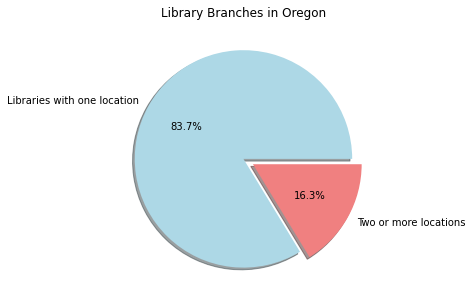

In [30]:
# Plot the pie chart using the count column

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Library Branches in Oregon')

plot = df_piechart.plot.pie(
    y='count',
    labels=['Libraries with one location', 'Two or more locations'],
    autopct="%1.1f%%",
    explode=(0, 0.1),
    shadow=True,
#     startangle=90
    colors = ['lightblue', 'lightcoral'],
    ax=ax
)

ax.get_legend().remove()
# plt.legend(loc=(0.8, 0.8))
ax.set_ylabel(None)

# Show the plot
plt.show()

With that many single locations, a better way to get a sense of where the libraries are in Oregon, would be to look at a map of the Population Served or Registered Users. Since Population Served has no null values, we'll look at that.

In [31]:
# PopulationServed
# Create a dataframe with library locations and zip codes and budget, revenue, population, users?
# df_2022['LibraryName']
# df_2022['ZIP']
# df_2022['PopulationServed']

marker_size = np.log(df_2022['PopulationServed'])

# Use pgeocode to get the latitude and longitude for each zip code
nomi = pgeocode.Nominatim('us')
df_2022.loc[:, 'Latitude'] = nomi.query_postal_code(df_2022['ZIP'].tolist()).latitude
df_2022.loc[:, 'Longitude'] = nomi.query_postal_code(df_2022['ZIP'].tolist()).longitude

# Use plotly to create a map with markers for each library
fig = go.Figure(data=go.Scattergeo(
    lon = df_2022['Longitude'],
    lat = df_2022['Latitude'],
    text = df_2022['LibraryName'],
    mode = 'markers',
    marker_size = marker_size,
    marker_color = 'rebeccapurple',
))

# Set the map scope to Oregon
fig.update_layout(
    title = 'Libraries in Oregon by Registered Users',
    geo_scope='usa',
    geo_center=dict(lon=-120.55, lat=43.9),
    geo_projection_scale=4,
)

# Show the map
fig.show()

Now we can get a better sense of the distribution of libraries in Oregon.  They are tightly clustered around the coast and the I-5 corridor. The locations are more scattered in the northeastern part of the state and the southern border.

### Library buildings

When were the libraries built? And have they been renovated? It would be interesting to see locations and years. Don't want to figure this out.

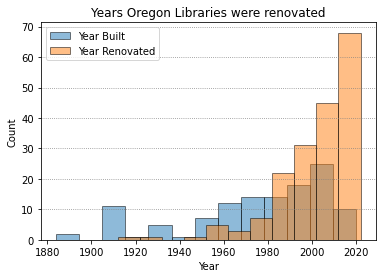

In [32]:
# fig = plt.subplots(1,2, figsize=(15,6))

ax = plt.axes()
ax.set_facecolor("white")

plt.hist(df['FacilitiesConstructionDate'].dropna(), bins=13, edgecolor='black', alpha=0.5, label='Year Built')
plt.title('Years Oregon Libraries were built')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(color = 'grey', axis='y', linestyle=':')

plt.hist(df['FacilitiesRemodelDate'].dropna(), bins=11, edgecolor='black', alpha=0.5, label='Year Renovated')
plt.title('Years Oregon Libraries were renovated')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(color = 'grey', axis='y', linestyle=':')

plt.legend()
plt.show()

## Data prep

Now we will transform and/or scale the data in preparation for machine learning.

In [33]:
# make a copy of the original dataframe
df_prepped = df_2022.copy()

**Sum columns to consolidate the data.**

In [34]:
# Staff
df_prepped['TotalStaffVols'] = df_prepped[['LibrariansALAMLS', 'LibrariansTotal', 'OtherStaff', 'Volunteers']].sum(axis=1)

In [35]:
# consolidate Friends/Foundation - true if there's a true in either Friends OR Found.
df_prepped['FriendsFound'] = (df_prepped['FriendsGroup'] == True) | (df_prepped['Foundation'] == True)

# change to 1s & 0s?
df_prepped['FriendsFound'] = df_prepped['FriendsFound'].astype(int)

In [36]:
# Revenue
rev_cols = list(df_prepped.filter(regex='Revenue'))
df_prepped['TotalRev'] = df_prepped[rev_cols].sum(axis=1)

In [37]:
# Expenditures except ExpendituresServiceCharges, which is a text field
exp_cols = [col for col in df_prepped.filter(regex='Expenditures') if col != 'ExpendituresServiceCharges']
df_prepped['TotalExp'] = df_prepped[exp_cols].sum(axis=1)

In [38]:
# Collection
# sum anything with Collection, except Added, ODLC (it's the same for every location), Other Languages (it's a text field), and Statewide
col_cols = [col for col in df_prepped.filter(regex='^(?=.*Collection)(?!.*Added$)(?!.*ODLC)(?!.*Statewide)') if col != 'CollectionOtherLanguages']
df_prepped['TotalColl'] = df_prepped[exp_cols].sum(axis=1)

In [39]:
# Circulation
df_prepped['TotalCirc'] = df_prepped[circ_cols].sum(axis=1)

In [40]:
# Programs anything with Programs in it, except SummerReading (everyone but 1 has it so it won't be a helpful feature), and Attendance
prog_cols = [col for col in df_prepped.filter(regex='^(?=.*Programs)(?!.*Attendance$)') if col != 'ProgramsSummerReading']
df_prepped['TotalProg'] = df_prepped[prog_cols].sum(axis=1)

# Program Attendance
prog_attend_cols = [col for col in df_prepped.filter(regex='^(?=.*Programs)(.*Attendance$)')]
df_prepped['TotalProgAttend'] = df_prepped[prog_attend_cols].sum(axis=1)   

In [41]:
# Fines - if 'Yes' in any column 'Fines', call it a 1
fines_cols = list(df_prepped.filter(regex='Fines'))
df_prepped['Fines'] = df_prepped[fines_cols].eq('Yes').any(axis=1).astype(int)

In [42]:
df_prepped.head(10)

LIBID  Year                        LibraryName  \
0  OR0040  2022  Adams Public Library                
1  OR0001  2022  Agness Community Library District   
2  OR0106  2022  Albany Public Library               
3  OR9010  2022  Aloha Community Library             
4  OR0002  2022  Amity Public Library                
5  OR0013  2022  Arlington Public Library            
6  OR0023  2022  Astoria Public Library              
7  OR0035  2022  Athena Public Library               
8  OR0046  2022  Baker County Library District       
9  OR0058  2022  Bandon Public Library               

                             Address        City    ZIP  \
0  190 Main St                        Adams       97810   
1  03905 Cougar Ln                    Agness      97406   
2  2450 14th Ave SE                   Albany      97322   
3  17455 SW Farmington Rd, Suite 26a  Aloha       97007   
4  307 S Trade St                     Amity       97101   
5  500 W 1st St                       Arlington   97812   
6  450 10th St                        Astoria     97103   
7  418 E Main St                      Athena      97813   
8  2400 Resort St                     Baker City  97814   
9  1204 11th St SW                    Bandon      97411   

                   MailingAddress MailingCity  MailingZIP      County  \
0  PO Box 20                       Adams       97810       Umatilla     
1  PO Box 33                       Agness      97406       Curry        
2  2450 14th Ave SE                Albany      97322       Linn         
3  17455 SW Farmington Rd Ste 26a  Aloha       97007       Washington   
4  PO Box 470                      Amity       97101       Yamhill      
5  PO Box 339                      Arlington   97812       Gilliam      
6  450 10th St                     Astoria     97103       Clatsop      
7  PO Box 450                      Athena      97813       Umatilla     
8  2400 Resort St                  Baker City  97814       Baker        
9  1204 11th St SW                 Bandon      97411       Coos         

          Phone DistCoop  CentralLibrary  Branches  Bookmobiles  TotalNumLib  \
0  541-566-3038  UCSLD    1               0         0            1             
1  541-247-6323  NONE     1               0         0            1             
2  541-917-7581  NONE     1               1         0            2             
3  503-259-0185  WCCLS    1               0         0            1             
4  503-835-8181  CCRLS    1               0         0            1             
5  541-705-2555  NONE     1               0         0            1             
6  503-325-7323  NONE     1               0         0            1             
7  541-566-2470  UCSLD    1               0         0            1             
8  541-523-6419  NONE     1               5         1            7             
9  541-347-3221  CCLSD    1               0         0            1             

   RegisteredUsers  RegisteredUsersAdded  LibrariansALAMLS  LibrariansTotal  \
0  233.0            21.0                  0.00              1.00              
1  102.0            4.0                   0.00              0.35              
2  35601.0          3275.0                9.50              9.50              
3  8704.0           1143.0                4.00              4.00              
4  645.0            45.0                  0.00              0.18              
5  198.0            20.0                  0.00              0.70              
6  3357.0           1226.0                1.00              1.00              
7  627.0            98.0                  0.00              1.00              
8  7700.0           527.0                 2.95              2.95              
9 NaN              NaN                    1.00              1.00              

   OtherStaff  Volunteers  VolunteerHours FriendsGroup Foundation  \
0  0.00        0.0         0.0             False        False       
1  0.25        12.0        60.0            False        False     

Now we'll select just the features we want to focus on that might have predictive power for determining a library's Registered User count, or Library Visits.

In a Linear Regression model, our features will ideally be continuous variables that have an effect on our dependent variable, the RegisteredUsers. For this project we will also be working with some features that are binary, on the scale [0,1]. With this information, we can remove any columns in the dataset that are not continuous or binary, and that we do not want to make predictions on. The cell below contains a list of these unnecessary features. 

In [43]:
# keep
features_to_keep = ['TotalNumLib','RegisteredUsers','TotalStaffVols','FriendsFound',
                    'TotalRev','TotalExp','TotalColl','TotalCirc','TotalProg','TotalProgAttend',
                    'TechPublicComputersSessions','TechPublicComputers','HoursOpenYear',
                    'LibraryVisits','FacilitiesSqFtTotal','Fines','PopulationServed']

In [44]:
df_prepped_users = df_prepped.filter(features_to_keep)

In [45]:
df_prepped_users.head()

TotalNumLib  RegisteredUsers  TotalStaffVols  FriendsFound   TotalRev  \
0  1            233.0            1.00            0             77481.0     
1  1            102.0            12.60           0             23656.0     
2  2            35601.0          485.81          1             3226440.0   
3  1            8704.0           32.55           0             702441.0    
4  1            645.0            7.36            1             11745.0     

    TotalExp  TotalColl  TotalCirc  TotalProg  TotalProgAttend  \
0  48709.0    48709.0    4659.0     173.0      1272.0            
1  22029.0    22029.0    2899.0     365.0      52.0              
2  3094698.0  3094698.0  402524.0   769.0      41726.0           
3  620655.0   620655.0   340738.0   2317.0     2041.0            
4  15193.0    15193.0    11074.0    63.0       392.0             

   TechPublicComputersSessions  TechPublicComputers  HoursOpenYear  \
0  180.0                        2.0                  1275.0          
1  350.0                        2.0                  728.0           
2  9210.0                       33.0                 1784.0          
3  1843.0                       7.0                  1584.0          
4  192.0                        4.0                  708.0           

   LibraryVisits  FacilitiesSqFtTotal  Fines  PopulationServed  
0  2092.0         425.0                0      542.0             
1  620.0          865.0                0      155.0             
2  88139.0        49170.0              0      57199.0           
3  29463.0        11308.0              0      21528.0           
4  2080.0         960.0                1      1809.0

Now we just have to check our data to make sure we don't have any missing values, or `NaN`s, which will prevent the Linear Regression model from running correctly.

In [46]:
df_prepped_users.isna().any()

TotalNumLib                    False
RegisteredUsers                True 
TotalStaffVols                 False
FriendsFound                   False
TotalRev                       False
TotalExp                       False
TotalColl                      False
TotalCirc                      False
TotalProg                      False
TotalProgAttend                False
TechPublicComputersSessions    False
TechPublicComputers            False
HoursOpenYear                  False
LibraryVisits                  True 
FacilitiesSqFtTotal            False
Fines                          False
PopulationServed               False
dtype: bool

As we can see, RegisteredUsers and LibraryVisits are still missing values. Since our dataset has no information recorded for some libraries in these columns, we will assume they did not submit these stats. We can replace all of our `NaN`s with `0`s.

In [47]:
df_prepped_users.fillna({'RegisteredUsers':0, 'LibraryVisits':0}, inplace=True)
df_prepped_users.isna().any()

TotalNumLib                    False
RegisteredUsers                False
TotalStaffVols                 False
FriendsFound                   False
TotalRev                       False
TotalExp                       False
TotalColl                      False
TotalCirc                      False
TotalProg                      False
TotalProgAttend                False
TechPublicComputersSessions    False
TechPublicComputers            False
HoursOpenYear                  False
LibraryVisits                  False
FacilitiesSqFtTotal            False
Fines                          False
PopulationServed               False
dtype: bool

Now that our data is all together, let's investigate some of the different features to see what might correlate most with our dependent variable, the RegisteredUsers or LibraryVisits. The features with the best correlations could prove to be the most helpful for our Linear Regression model! 

A correlation of `0` indicates that two features have no linear relationship, a correlation coefficient of `1` indicates two features have a perfect positive linear relationship. A correlation coefficient of `-1` indicates two features have a perfect negative linear relationship.

In [48]:
corr = df_prepped_users.corr()
corr

TotalNumLib  RegisteredUsers  TotalStaffVols  \
TotalNumLib                  1.000000     0.767023         0.582526         
RegisteredUsers              0.767023     1.000000         0.803506         
TotalStaffVols               0.582526     0.803506         1.000000         
FriendsFound                 0.074196     0.063947         0.102787         
TotalRev                     0.735144     0.955239         0.801841         
TotalExp                     0.728294     0.935277         0.796577         
TotalColl                    0.728294     0.935277         0.796577         
TotalCirc                    0.656885     0.951060         0.817469         
TotalProg                    0.089241     0.125003         0.091315         
TotalProgAttend              0.552102     0.648416         0.493432         
TechPublicComputersSessions  0.763473     0.951095         0.788813         
TechPublicComputers          0.816265     0.922526         0.752495         
HoursOpenYear                0.200960     0.300173         0.309780         
LibraryVisits                0.737749     0.974445         0.817528         
FacilitiesSqFtTotal          0.811824     0.935847         0.735755         
Fines                       -0.144878    -0.131687        -0.032829         
PopulationServed             0.770553     0.980391         0.806371         

                             FriendsFound  TotalRev  TotalExp  TotalColl  \
TotalNumLib                  0.074196      0.735144  0.728294  0.728294    
RegisteredUsers              0.063947      0.955239  0.935277  0.935277    
TotalStaffVols               0.102787      0.801841  0.796577  0.796577    
FriendsFound                 1.000000      0.035445  0.042618  0.042618    
TotalRev                     0.035445      1.000000  0.986650  0.986650    
TotalExp                     0.042618      0.986650  1.000000  1.000000    
TotalColl                    0.042618      0.986650  1.000000  1.000000    
TotalCirc                    0.047207      0.958198  0.963216  0.963216    
TotalProg                    0.073505      0.106341  0.071840  0.071840    
TotalProgAttend              0.082963      0.512330  0.433356  0.433356    
TechPublicComputersSessions  0.060268      0.975809  0.977154  0.977154    
TechPublicComputers          0.074814      0.943530  0.939914  0.939914    
HoursOpenYear                0.129800      0.265213  0.206431  0.206431    
LibraryVisits                0.046951      0.967936  0.941457  0.941457    
FacilitiesSqFtTotal          0.127695      0.866353  0.835738  0.835738    
Fines                        0.089638     -0.095367 -0.096664 -0.096664    
PopulationServed             0.071208      0.975330  0.966618  0.966618    

                             TotalCirc  TotalProg  TotalProgAttend  \
TotalNumLib                  0.656885   0.089241   0.552102          
RegisteredUsers              0.951060   0.125003   0.648416          
TotalStaffVols               0.817469   0.091315   0.493432          
FriendsFound                 0.047207   0.073505   0.082963          
TotalRev                     0.958198   0.106341   0.512330          
TotalExp                     0.963216   0.071840   0.433356          
TotalColl                    0.963216   0.071840   0.433356          
TotalCirc                    1.000000   0.093835   0.499219          
TotalProg                    0.093835   1.000000   0.334675          
TotalProgAttend              0.499219   0.334675   1.000000          
TechPublicComputersSessions  0.946352   0.105501   0.480131          
TechPublicComputers          0.888019   0.092532   0.492582          
HoursOpenYear                0.267045   0.119508   0.381352          
LibraryVisits                0.946427   0.152212   0.624976          
FacilitiesSqFtTotal          0.836045   0.169611   0.698551          
Fines                       -0.074606   0.086587  -0.186959          
PopulationServed             0.960211   0.122732   0.571478          

            

And it can be easier to see it in graphical format, and seaborn does a really great job with that.

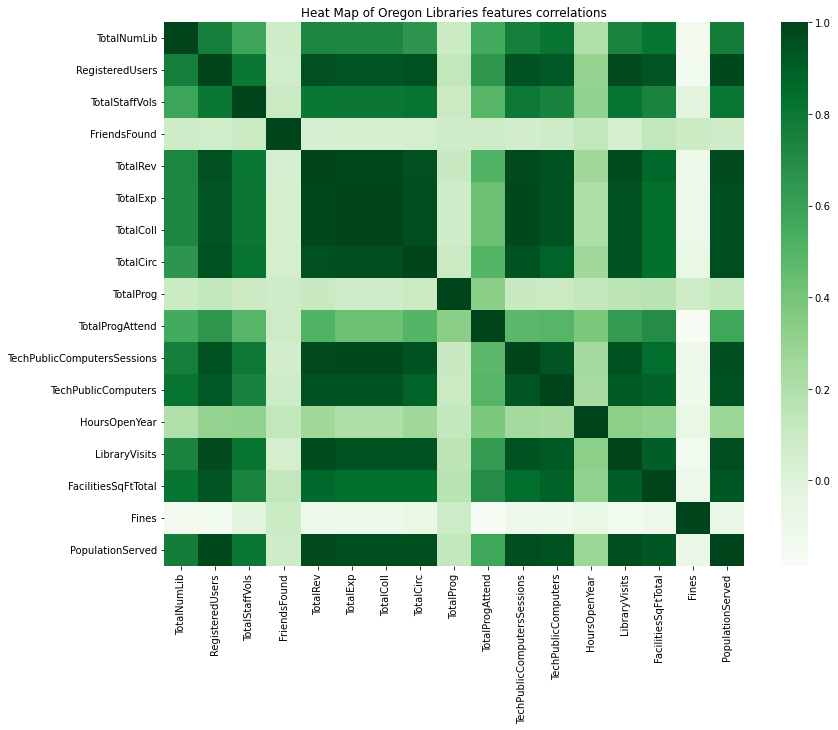

In [49]:
plt.figure(figsize = (13, 10))
sns.heatmap(corr, cmap="Greens", annot=False)
plt.title('Heat Map of Oregon Libraries features correlations')
plt.show()

If we look at the line for `RegisteredUsers`, we can see that there are several darker squares, which correspond to positive linear relationship. The money features - **Revenue** and **Expenditures**, the **Collection** size, **Circulation** numbers, **Computer** use, **Library Visits**, the total **Square Feet of the buildings**, and **Population Served** are the most strongly correlated. **Total Staff**, and **Total Number of Libraries** are just slightly less correlated. 

If we look at the line for `LibraryVisits`, we can see the same exact trends, but with `RegisteredUsers` taking the place of `LibraryVisits`.

It is interesting to note that whether **Fines** are collected or not has a slight negative linear relationship to almost everything. That means the more likely the library is to charge fines, the other feature will decrease, like **Registered Users**, **Program Attendance**, and **Library Visits**. However, keep in mind that correlation does not imply causation, so we can't conclude that say, charging fines causes program attendance to decrease. There may be other factors that influence both variables or explain their relationship.

Let's also take a look at pair plot, which will give us some insight as to how our data is distributed.

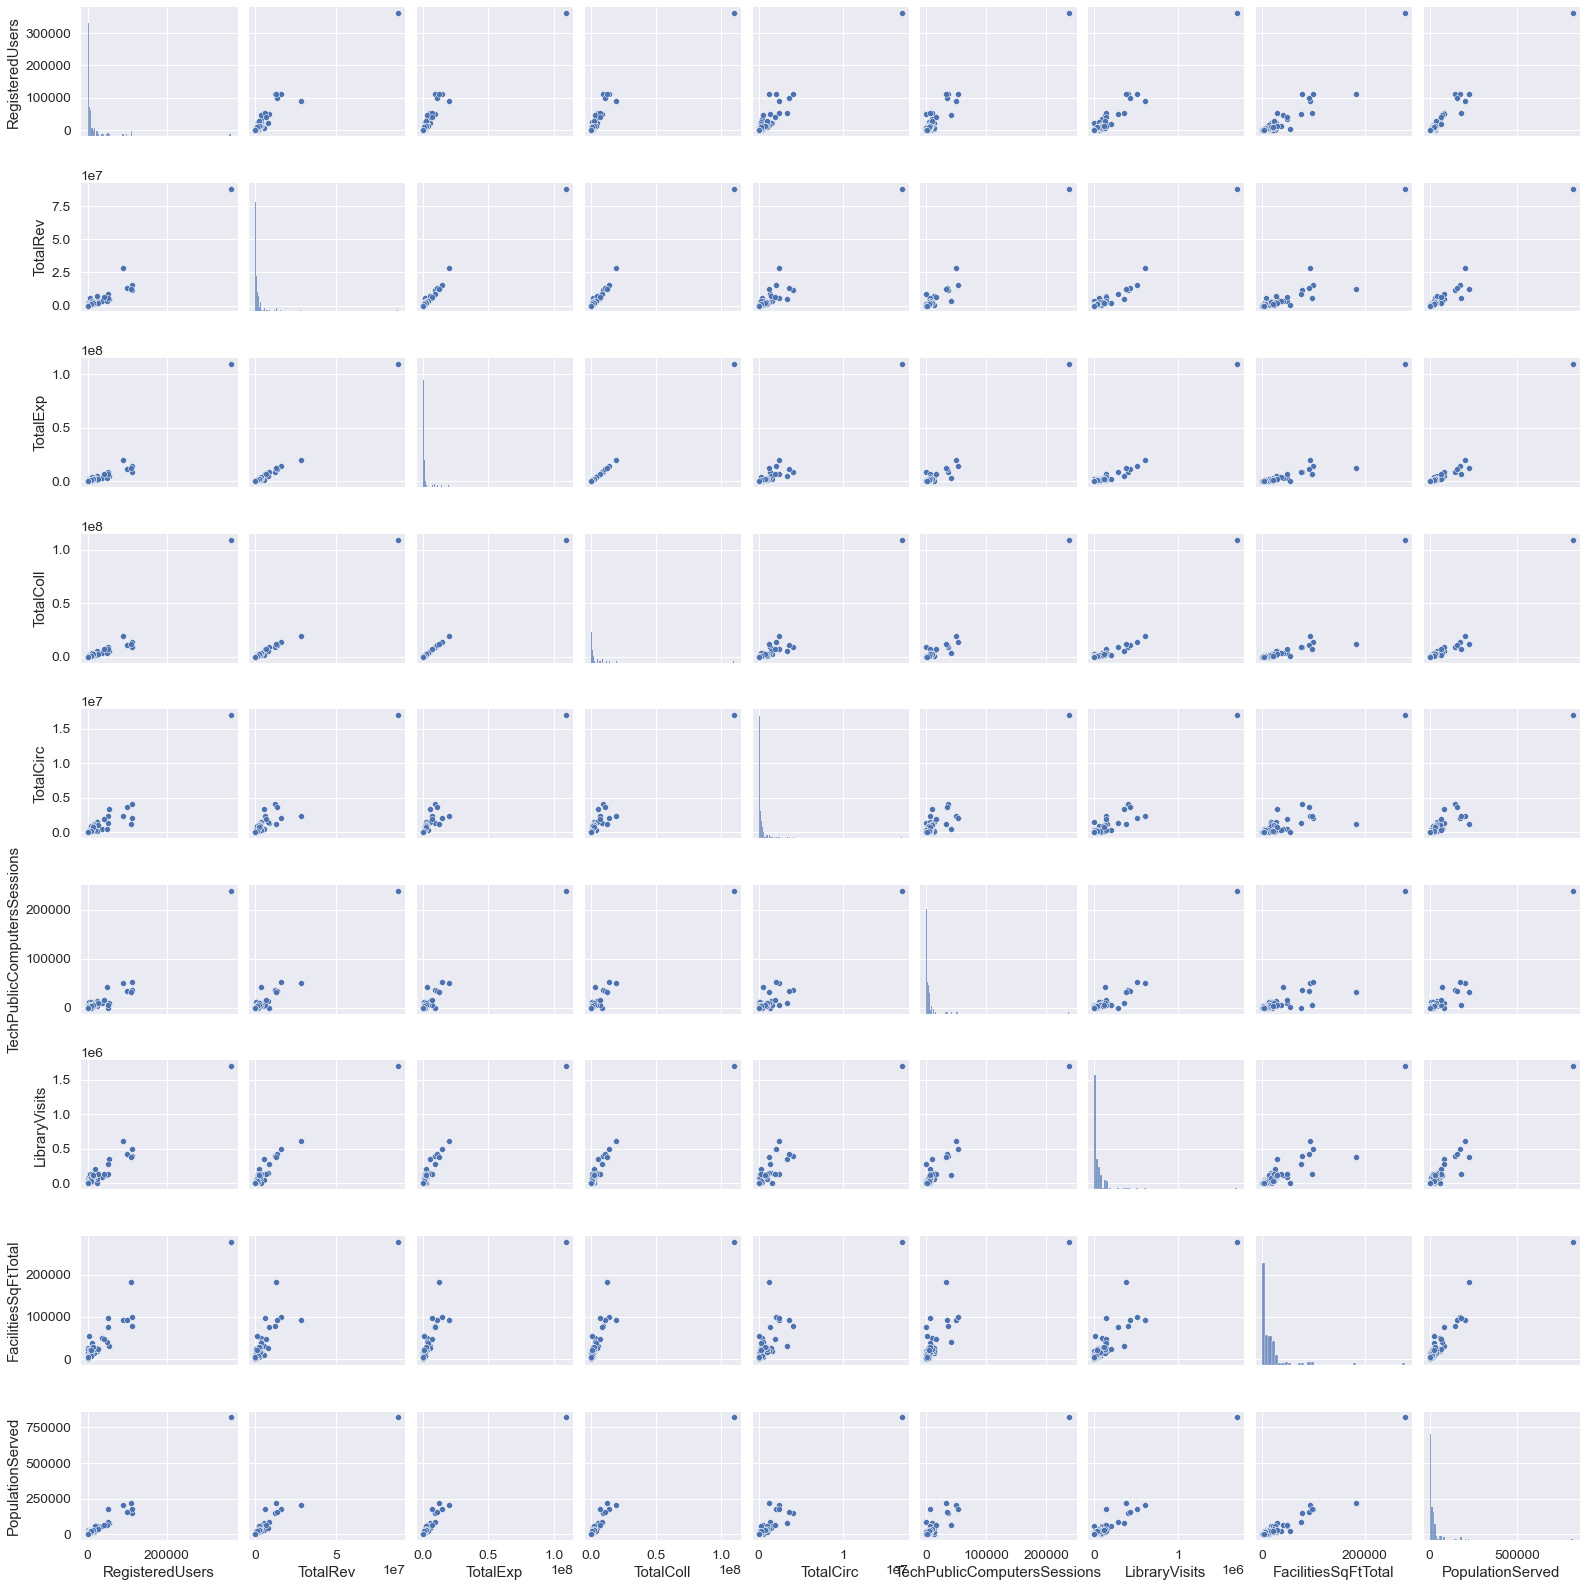

In [50]:
df_pairplot = df_prepped_users[['RegisteredUsers','TotalRev','TotalExp','TotalColl','TotalCirc','TechPublicComputersSessions',
                                'LibraryVisits','FacilitiesSqFtTotal','PopulationServed']]
sns.set(font_scale=1.25)
sns.pairplot(df_pairplot)
plt.show()

All of the correlations look linear.  There is one oulier in all categories, and the data is left-skewed, possibly because of that one library. This indicates we might need to use the log to normalize our data.

## Machine learning


In exploring the data, it turns out there are no **Registered User** numbers for Coos County libraries. Can we use the above information to predict the missing values?  Can we also use it to fill in the missing **LibraryVisits**?

## The first try for RegisteredUsers
We will try to model this with linear regression, and without doing any scaling of the data.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df_prepped_users[['TotalRev','TotalExp','TotalColl','TotalCirc','TechPublicComputersSessions',
                      'LibraryVisits','FacilitiesSqFtTotal','PopulationServed']]
y = df_prepped_users[['RegisteredUsers']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
 
print(y_train.shape)
print(y_test.shape)

(108, 8)
(27, 8)
(108, 1)
(27, 1)


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_predict = mlr.predict(X_test)

print('Training score with unscaled data')
print(mlr.score(X_train,y_train))
print('Testing score with unscaled data')
print(mlr.score(X_test,y_test))

print('Coefficients:')
print(mlr.coef_)
print('Intercept:')
print(mlr.intercept_)

Training score with unscaled data
0.9869763060713789
Testing score with unscaled data
0.9477401433956034
Coefficients:
[[ 0.00161451 -0.00126769 -0.00126769  0.00696376  0.59550131  0.04830771
   0.22865448  0.11661895]]
Intercept:
[-2425.43098681]


Let's see what happens with one of the libraries that is missing the **RegisteredUsers**.

In [55]:
north_bend_lib = [[1688002.0, 952076.0, 952076.0, 201353.0, 3524.0, 49937.0, 22129.0, 14549.0]]
predict = mlr.predict(north_bend_lib)
 
print("Predicted registered users: %.0f" % predict)

Predicted registered users: 10556


And let's see what happens with a couple libraries where we know the actual value for **RegisteredUsers**.

In [56]:
adams_lib = [[77481.0, 48709.0, 48709.0, 4659.0, 180.0, 2092.0, 425.0, 542.0]]
predict = mlr.predict(adams_lib)
print("Predicted registered users for Adams: %.0f" % predict)
# Actual is: 233.0

Predicted registered users for Adams: -2023


In [57]:
pendleton_lib = [[897235.0, 858153.0, 858153.0, 85396.0, 5454.0, 39479.0, 15000.0, 23662.0]]
predict = mlr.predict(pendleton_lib)
print("Predicted registered users for Pendelton: %.0f" % predict)
# 6178.0

Predicted registered users for Pendelton: 8786


So even though we got great training and testing scores, we had a negative intercept, and as we can see we got a negative value for the Adams Public Library that has a quite low amount of users.

## The second try

Let's see what happens when we try a log transformation of the data.  This is useful when there are outliers in the data, and when the data is skewed, which as we saw, all of the data is right-skewed, possibly because of the one large library system.

When testing the model, we will have to enter log transformed values, then take the exponent to get the actual resulting values.

In [58]:
df_log_xform = np.log(df_prepped_users[['RegisteredUsers','TotalRev','TotalExp','TotalColl','TotalCirc','TechPublicComputersSessions',
                                'LibraryVisits','FacilitiesSqFtTotal','PopulationServed']].replace(0,1))
df_log_xform.head(10)

RegisteredUsers   TotalRev   TotalExp  TotalColl  TotalCirc  \
0  5.451038         11.257788  10.793619  10.793619  8.446556    
1  4.624973         10.071372  10.000115  10.000115  7.972121    
2  10.480129        14.986890  14.945201  14.945201  12.905510   
3  9.071538         13.462317  13.338531  13.338531  12.738869   
4  6.469250         9.371183   9.628590   9.628590   9.312355    
5  5.288267         11.073428  11.030525  11.030525  8.155936    
6  8.118803         14.464162  13.182696  13.182696  10.214129   
7  6.440947         11.609980  11.623724  11.623724  9.432684    
8  8.948976         14.300195  14.075891  14.075891  11.697045   
9  0.000000         13.013671  12.737151  12.737151  11.968621   

   TechPublicComputersSessions  LibraryVisits  FacilitiesSqFtTotal  \
0  5.192957                     7.645876       6.052089              
1  5.857933                     6.429719       6.762730              
2  9.128045                     11.386670      10.803039             
3  7.519150                     10.290891      9.333266              
4  5.257495                     7.640123       6.866933              
5  5.257495                     7.685703       7.608871              
6  8.283747                     0.000000       9.265207              
7  6.678342                     8.959697       8.188689              
8  8.886271                     11.302957      10.199101             
9  6.733402                     9.671934       9.577757              

   PopulationServed  
0  6.295266          
1  5.043425          
2  10.954292         
3  9.977110          
4  7.500529          
5  6.476972          
6  9.229849          
7  7.420579          
8  9.732699          
9  8.890548

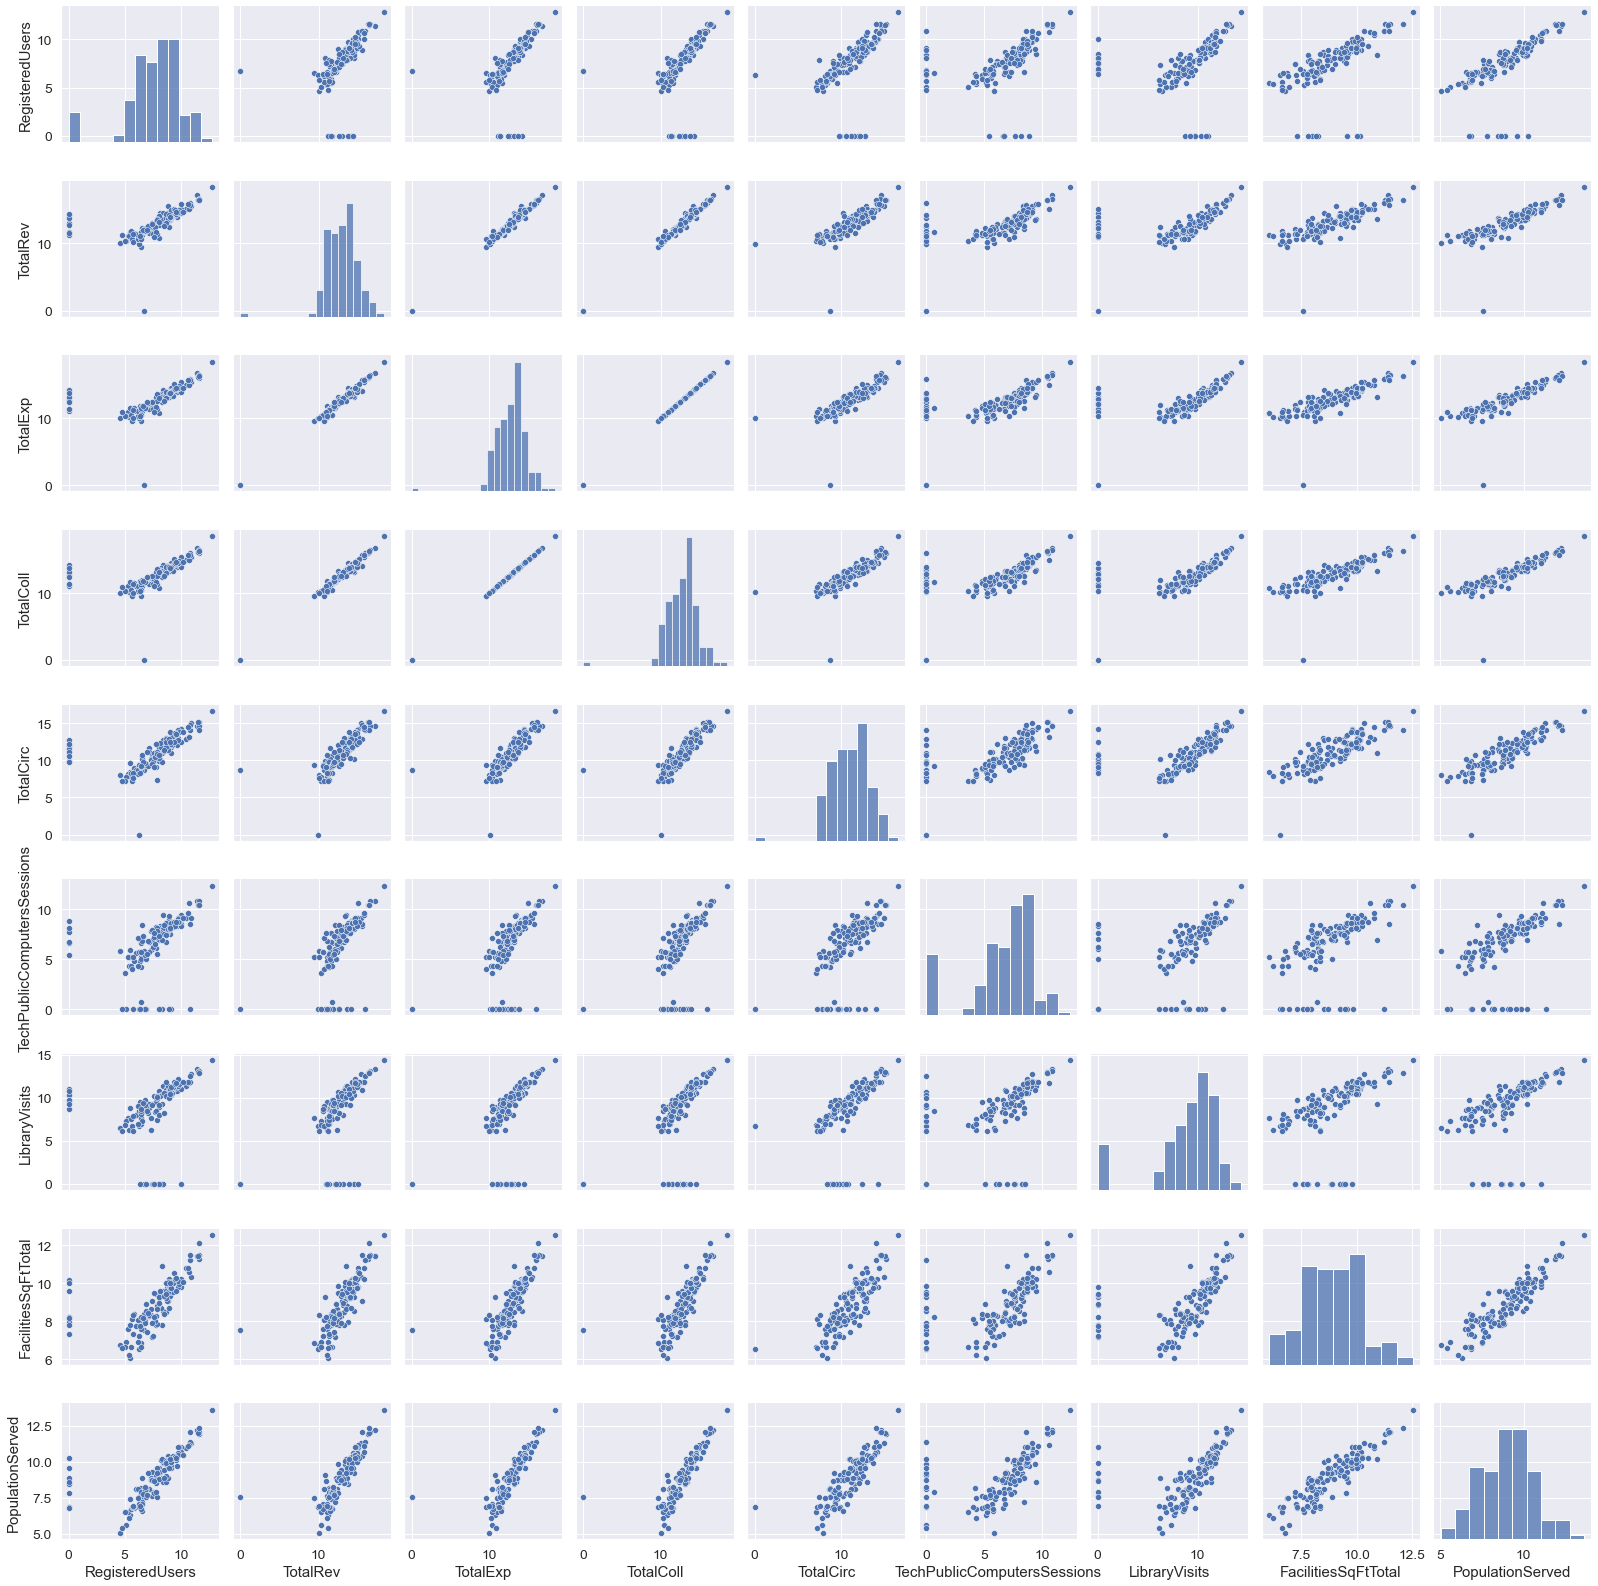

In [59]:
sns.set(font_scale=1.25)
sns.pairplot(df_log_xform)
plt.show()

Nice normalized data!  Lovely linear trends! We still have outliers!

In [60]:
X = df_log_xform[['TotalRev','TotalExp','TotalColl','TotalCirc','TechPublicComputersSessions',
                      'LibraryVisits','FacilitiesSqFtTotal','PopulationServed']]
y = df_log_xform[['RegisteredUsers']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(108, 8)
(27, 8)
(108, 1)
(27, 1)


In [61]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_predict = model_lr.predict(X_test)

print('Training score with scaled data')
print(model_lr.score(X_train,y_train))
print('Testing score with scaled data')
print(model_lr.score(X_test,y_test))

print('Coefficients:')
print(model_lr.coef_)
print('Intercept:')
print(model_lr.intercept_)

Training score with scaled data
0.48477880353505687
Testing score with scaled data
0.4084035033188149
Coefficients:
[[-0.50714917  0.29899028  0.29899028 -0.16632498 -0.04615457 -0.08637026
   0.2205436   1.19791471]]
Intercept:
[-3.36088264]


A score of .70 is considered good.  However, now our intercept is less negative.

Let's look at some predicted and actual values again.

In [62]:
north_bend_lib = np.log([[1688002.0, 952076.0, 952076.0, 201353.0, 3524.0, 49937.0, 22129.0, 14549.0]])
predict = model_lr.predict(north_bend_lib)
 
print("Predicted registered users for North Bend: %.0f" % np.exp(predict))

Predicted registered users for North Bend: 2822


In [63]:
adams_lib = np.log([[77481.0, 48709.0, 48709.0, 4659.0, 180.0, 2092.0, 425.0, 542.0]])
predict = model_lr.predict(adams_lib)

print("Predicted registered users for Adams: %.0f" % np.exp(predict))
# actual 233.0

Predicted registered users for Adams: 52


In [64]:
pendleton_lib = np.log([[897235.0, 858153.0, 858153.0, 85396.0, 5454.0, 39479.0, 15000.0, 23662.0]])
predict = model_lr.predict(pendleton_lib)
print("Predicted registered users for Pendleton: %.0f" % np.exp(predict))
# acutal: 6178.0

Predicted registered users for Pendleton: 6928


That's... not bad?  Should we try library visits?

## Modeling Library Visits

In [65]:
X = df_log_xform[['TotalRev','TotalExp','TotalColl','TotalCirc','TechPublicComputersSessions',
                  'FacilitiesSqFtTotal','PopulationServed','RegisteredUsers']]
y = df_log_xform[['LibraryVisits']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(108, 8)
(27, 8)
(108, 1)
(27, 1)


In [66]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_predict = model_lr.predict(X_test)

print("Training score with scaled data:")
print(model_lr.score(X_train,y_train))
print("Testing score with scaled data:")
print(model_lr.score(X_test,y_test))

print('Coefficients:')
print(model_lr.coef_)
print('Intercept:')
print(model_lr.intercept_)

Training score with scaled data:
0.388770293701437
Testing score with scaled data:
0.271299782291304
Coefficients:
[[-0.99592237  0.77667046  0.77667046  0.17653184  0.23974856  0.59935798
  -0.24337156 -0.16214542]]
Intercept:
[-3.54363247]


The model performed similarly, as expected.  Let's try predicting a value and testing to see how the model does with known values.

In [67]:
astoria_lib = np.log([[1912960.0, 531095.0, 531095.0, 27286.0, 3959.0, 10564.0, 10197.0, 3357.0]])
predict = model_lr.predict(astoria_lib)
 
print("Predicted Library Visits for Astoria: %.0f" % np.exp(predict))

Predicted Library Visits for Astoria: 4056


In [68]:
adams_lib = np.log([[77481.0, 48709.0, 48709.0, 4659.0, 180.0, 2092.0, 542.0, 233.0]])
predict = model_lr.predict(adams_lib)

print("Predicted Library Visits for Adams: %.0f" % np.exp(predict))
# actual 2092.0

Predicted Library Visits for Adams: 1006


In [69]:
pendleton_lib = np.log([[897235.0, 858153.0, 858153.0, 85396.0, 5454.0, 15000.0, 23662.0, 6178.0]])
predict = model_lr.predict(pendleton_lib)
print("Predicted Library Visits for Pendleton: %.0f" % np.exp(predict))
# acutal: 39479.0

Predicted Library Visits for Pendleton: 21850


I would not put too much confidence in this model, unless we were looking for numbers on the same order or magnitude, which could be enough for some uses. 

## Conclusion

During this process, I learned a little more about how to model data, but still feel like I have so much to learn.  I was expecting to be able to predict the missing values easily, since so much of the data was so linearly related.  How does one  finesse the model to give better results? 

I also feel like more domain knowledge would have been helpful during this process. I do know that some library systems are consortiums or districts, but the libraries within are still considered single locations. This affects the data as far as how many users and visits occur in each system, as well as all the other features.  For example, Multnomah County was a significant outlier, being the largest library system in Oregon, which has 19 branches.  These branches are considered one location and all the features are consolidated.  There are 13 single library locations in Clackamas county, however they are part of LINCC (Libraries in Clackamas County), "an informal resource and revenue sharing network". So their revenue consolidated would be more than each singly, it would seem.  

Even with minimal domain knowledge, a bit more background research would be helpful in getting a more accurate model to predict missing features in this data.